In [3]:
from google.colab import drive
drive.mount("/content/drive")
#veri dosyalarını eklemek için link

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded=files.upload()
#dosyaları eklemek için

Saving supermarket.csv to supermarket.csv


In [5]:
import numpy as np
import pandas as pn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pn.read_csv("supermarket.csv")

#EDA


In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df["City"].unique()   # kaç yerde var bu marketten

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
df["Branch"].unique()   

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df["Branch"].nunique()   # kaç tane şubesi var diye bakıyoruz. Her şehirde bir tane

3

In [ ]:
 df["Total"].max(),df["Total"].min(), df["Total"].std(), df["Total"].var(), df["Total"].mean()

(1042.65, 10.6785, 245.88533510097207, 60459.598017717326, 322.96674900000005)

Tarihleri ekleme

In [8]:
df["Date"]=pn.to_datetime(df["Date"])

In [9]:
df["day"]=(df["Date"]).dt.day
df["month"]=(df["Date"]).dt.month
df["year"]=(df["Date"]).dt.year

In [10]:
df["month_name"]=(df["Date"]).dt.month_name()

In [11]:
df["weekday"]=(df["Date"]).dt.day_name()

In [12]:
df["Time"]=pn.to_datetime(df["Time"])

In [13]:
df["Hour"]=(df["Time"]).dt.hour

# Veri Görselleştirmesi ve incelenmesi

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

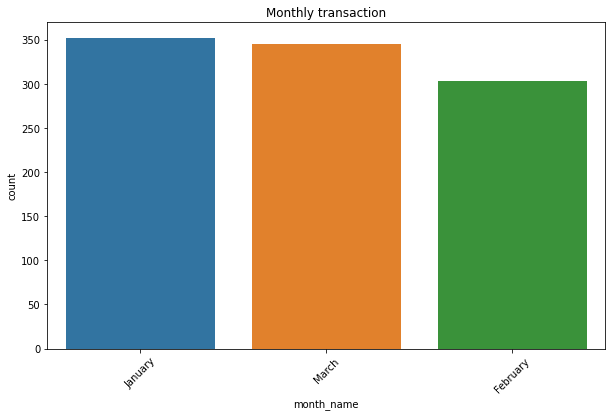

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Monthly transaction")
sns.countplot(df["month_name"])
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

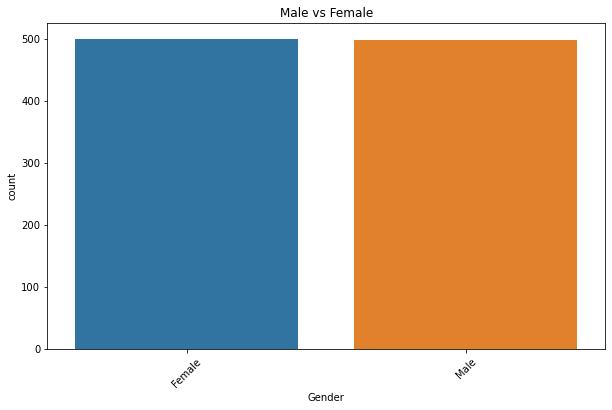

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Male vs Female")
sns.countplot(df["Gender"])
plt.xticks(rotation=45)

In [ ]:
df["month_name"].value_counts()

January     352
March       345
February    303
Name: month_name, dtype: int64

In [ ]:
df["weekday"].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

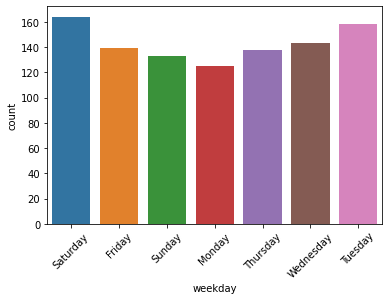

In [ ]:
sns.countplot(df["weekday"])
plt.xticks(rotation=45)              # alttaki yazıları 45 çevirir

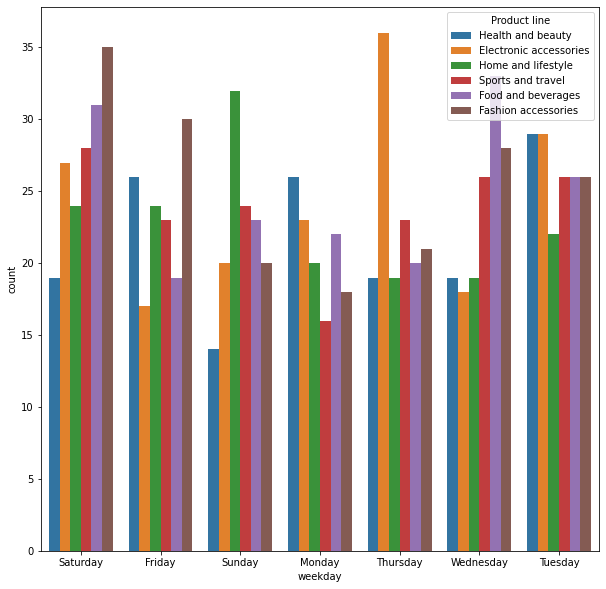

In [66]:
plt.figure(figsize=(10,10))
sns.countplot(df["weekday"],hue=df['Product line'])  

# Günlere göre satılan ürün kategorisinin yoğunluğu

Text(0.5, 1.0, 'Transcation per month ')

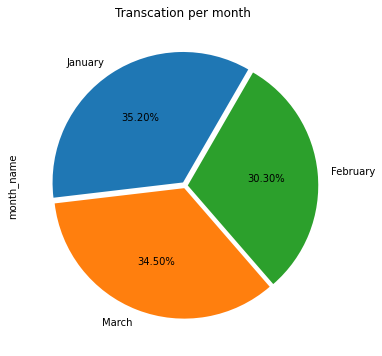

In [67]:
plt.figure(figsize=(10,6))
explode=(0.03,0.02,0.02)             # ayrıklık
df["month_name"].value_counts().plot.pie(autopct="%1.2f%%",startangle=60,explode=explode) 
plt.title('Transcation per month ')
# autopct= yüzdeler ,   startangele = çevirme

Text(0.5, 1.0, 'Transcation per month ')

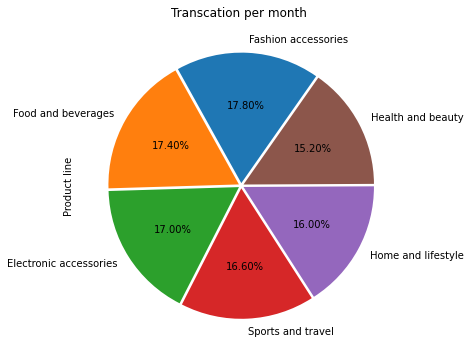

In [68]:
plt.figure(figsize=(10,6))
explode=(0.02,0.02,0.02,0.02,0.02,0.02)             # ayrıklık
df["Product line"].value_counts().plot.pie(autopct="%1.2f%%",startangle=55,explode=explode)
plt.title('Transcation per month ')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

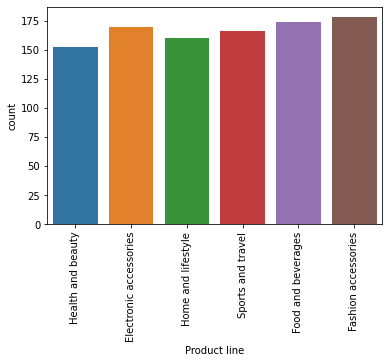

In [ ]:
sns.countplot(df['Product line'])
plt.xticks(rotation=90)

# kategorilerin toplam sayıları

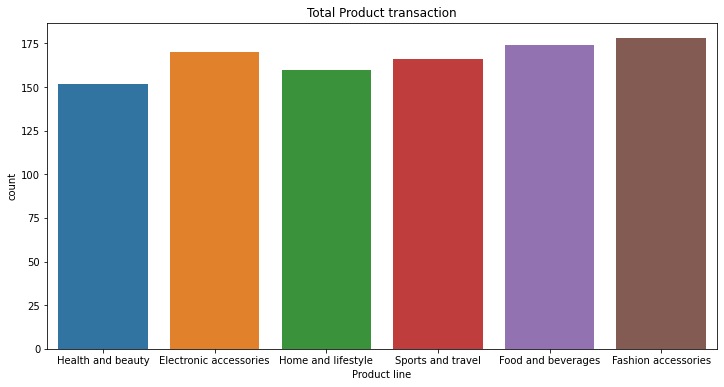

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Total Monthly  transaction')
sns.countplot(df['Product line'])

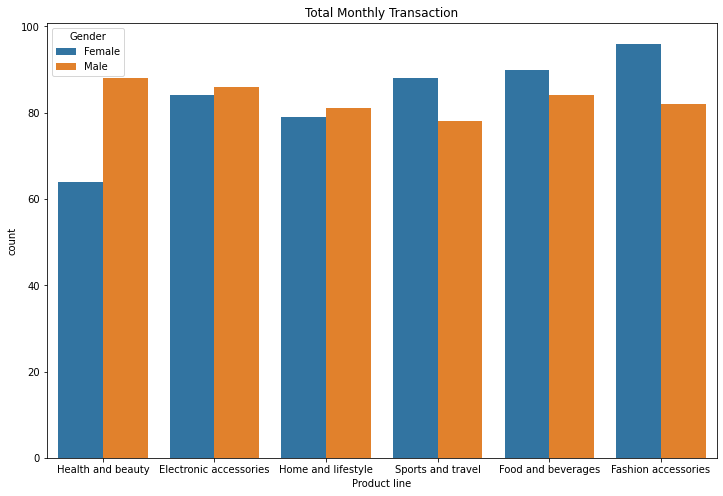

In [75]:
plt.figure(figsize=(12,8))
plt.title("Total Monthly Transaction")
sns.countplot(df["Product line"],hue=df['Gender'])

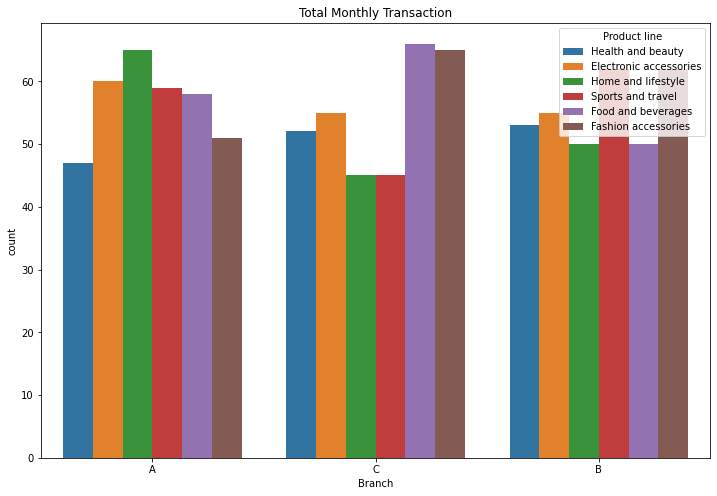

In [76]:
plt.figure(figsize=(12,8))
plt.title("Total Monthly Transaction")
sns.countplot(df["Branch"],hue=df["Product line"])

In [70]:
df.groupby(['City',"Branch",'Product line']).mean()

Unit price  ...       Hour
City      Branch Product line                        ...           
Mandalay  B      Electronic accessories   49.854182  ...  15.709091
                 Fashion accessories      54.843871  ...  15.758065
                 Food and beverages       55.540000  ...  15.480000
                 Health and beauty        58.185660  ...  14.622642
                 Home and lifestyle       55.514000  ...  14.340000
                 Sports and travel        59.678065  ...  14.870968
Naypyitaw C      Electronic accessories   55.809455  ...  14.672727
                 Fashion accessories      59.736000  ...  14.923077
                 Food and beverages       57.273030  ...  15.636364
                 Health and beauty        55.971346  ...  14.730769
                 Home and lifestyle       54.334222  ...  14.800000
                 Sports and travel        55.107333  ...  14.511111
Yangon    A      Electronic accessories   54.871167  ...  14.616667
                 Fashion accessories      56.670392  ...  14.372549
                 Food and beverages       54.974483  ...  15.017241
                 Health and beauty        49.862340  ...  15.297872
                 Home and lifestyle       55.845692  ...  14.292308
                 Sports and travel        55.610339  ...  14.542373

[18 rows x 12 columns]

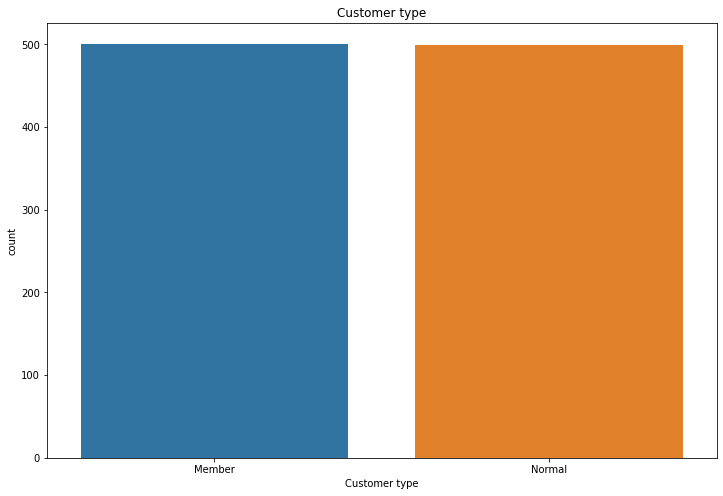

In [78]:
plt.figure(figsize=(12,8))
plt.title("Customer type")
sns.countplot(df["Customer type"])


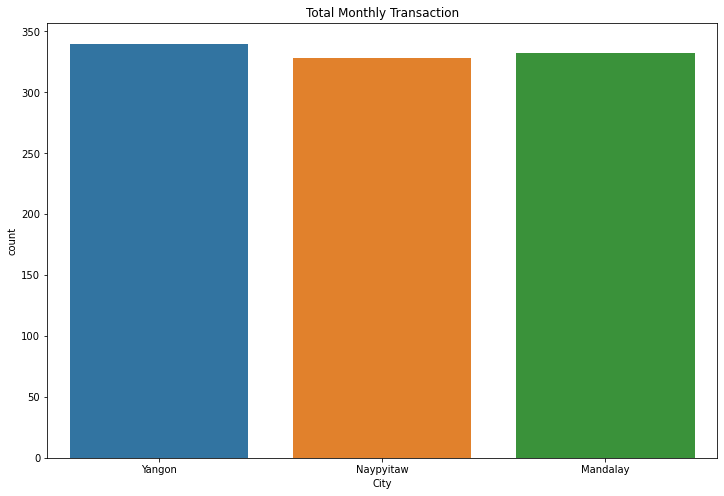

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Total Monthly Transaction")
sns.countplot(df["City"])

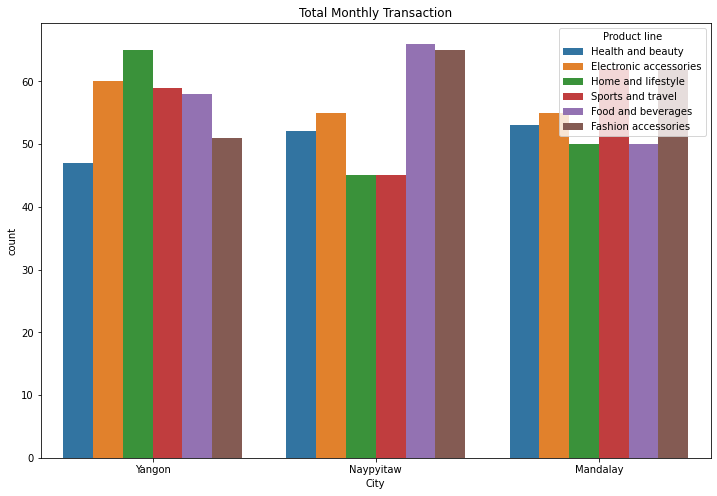

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Total Monthly Transaction")
sns.countplot(df["City"],hue=df["Product line"])


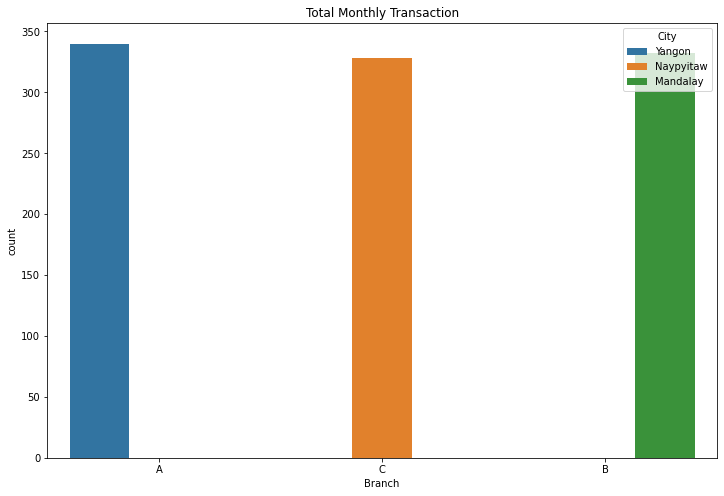

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Total Monthly Transaction")
sns.countplot(df["Branch"],hue=df["City"])

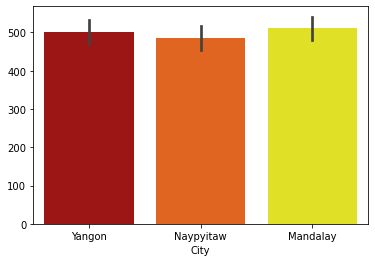

In [ ]:
sns.barplot(x=df['City'],y=df.index,palette='hot')

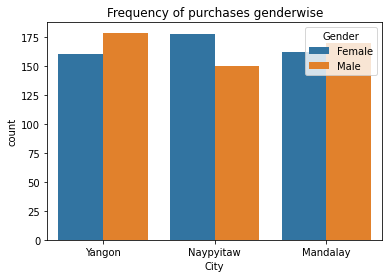

In [ ]:
plt.title('Frequency of purchases genderwise')
sns.countplot(df['City'],hue=df['Gender'])

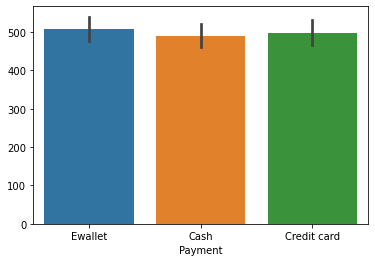

In [ ]:
sns.barplot(x=df.Payment,y=df.index)

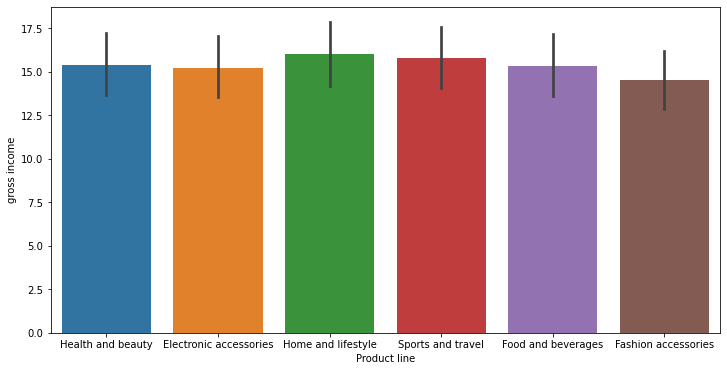

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'],y=df['gross income'])

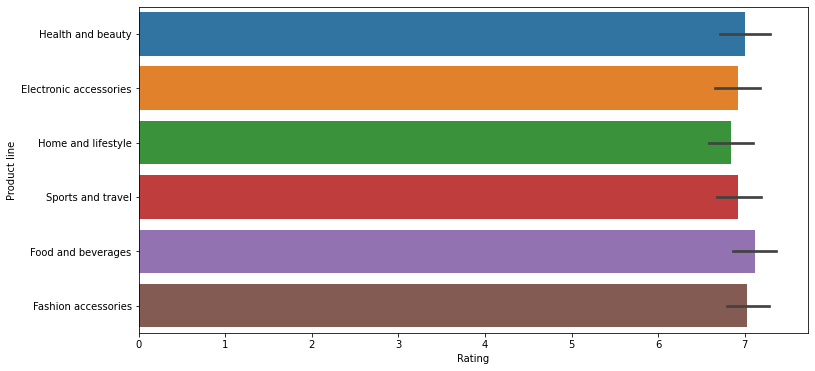

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['Product line'],x=df['Rating']);
#rating müşterilerin verdiği not

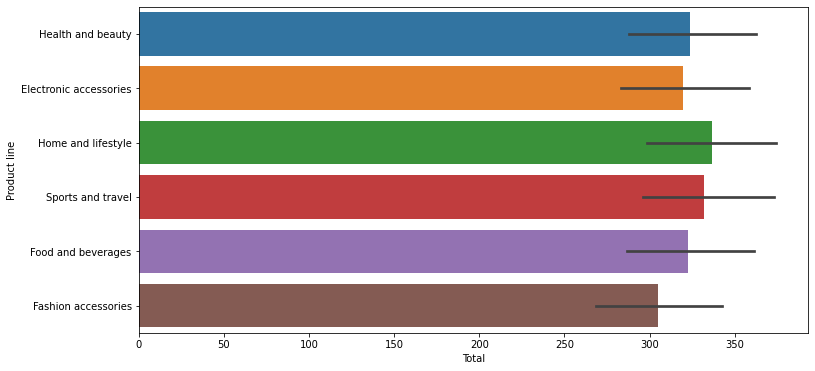

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'],y=df['Product line']);

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Quantity']);
#quantity bir seferde bir üründen kaç defa alınıyor yani sepete kaç tane koymuş

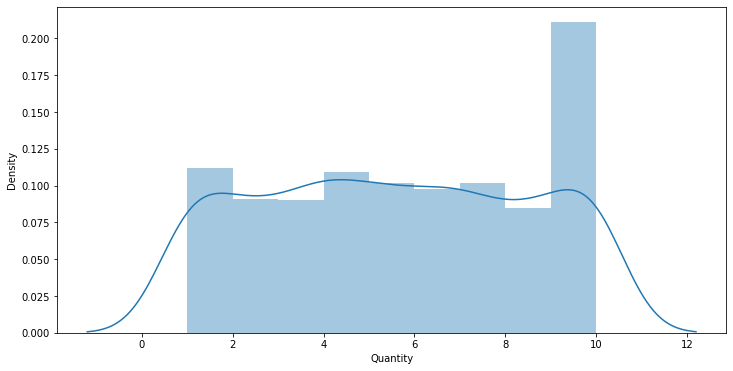

In [81]:
plt.figure(figsize=(12,6))
sns.distplot(df['Quantity'])    # quantity: tek seferde bir üründen sepete kaç tane koyduğu sayısı.

In [ ]:
df['Hour'].nunique()

11

In [ ]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [83]:
df['weekday'].nunique()

7

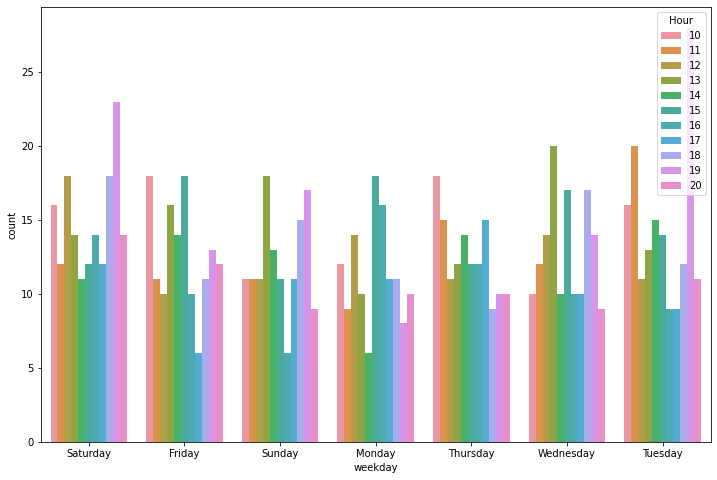

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(df['weekday'],hue=df['Hour'])

In [85]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000
